In this project I want to answer the following questions:
- What are the most preferred programming languages?
- Which Web-Framework developer earn the highest salaries
- which country has the hightest total compensations?

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read Data
df = pd.read_csv("data/survey_results_public.csv")

In [22]:
df.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,DevType,OrgSize,...,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,Age,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,"Developer, mobile",20 to 99 employees,...,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,25-34 years old,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,NaN,NaN,...,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,18-24 years old,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,NaN,NaN,...,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,18-24 years old,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,"Developer, front-end",100 to 499 employees,...,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,35-44 years old,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",...,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,NaN,NaN,Flask,Flask,25-34 years old,NaN


In [4]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [21]:
columns = ['LearnCode', 'YearsCode',
       'YearsCodePro', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase']
df = df.drop(columns=columns)

In [5]:
df.LanguageHaveWorkedWith.value_counts()

Python                                                                                                 1337
HTML/CSS;JavaScript;Node.js;TypeScript                                                                  811
Java                                                                                                    715
HTML/CSS;JavaScript;PHP;SQL                                                                             674
C#                                                                                                      597
                                                                                                       ... 
Assembly;Bash/Shell;C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Perl;PHP;Python;SQL;VBA       1
C#;C++;Dart;Go;JavaScript;Node.js;SQL;TypeScript                                                          1
Bash/Shell;C;C++;Groovy;HTML/CSS;Java;JavaScript;Node.js;SQL;TypeScript                                   1
Bash/Shell;C;HTML/CSS;JavaSc

In [11]:
#
def create_dict_from_col(dataframe, column):

    data = dataframe[dataframe[column].notnull()] #make sure to remove null values

    values = {} #init dict

    for row in data[column].to_list():
        languages = row.split(";")
        for l in languages:
            if l in values:
                values[l] +=1
            else:
                values[l] = 1
    return values

In [16]:
LanguageWantToWorkWith = create_dict_from_col(df, "LanguageWantToWorkWith")
LanguageHaveWorkedWith = create_dict_from_col(df, "LanguageHaveWorkedWith")

In [18]:
LanguageHaveWorkedWith

{'C++': 20057,
 'HTML/CSS': 46259,
 'JavaScript': 53587,
 'Objective-C': 2310,
 'PHP': 18130,
 'Swift': 4204,
 'Python': 39792,
 'Assembly': 4632,
 'C': 17329,
 'R': 4185,
 'Rust': 5799,
 'TypeScript': 24909,
 'Bash/Shell': 22385,
 'SQL': 38835,
 'C#': 22984,
 'Java': 29162,
 'Node.js': 27975,
 'PowerShell': 8871,
 'Ruby': 5569,
 'Perl': 2028,
 'Matlab': 3846,
 'Kotlin': 6866,
 'Julia': 1068,
 'Haskell': 1749,
 'Delphi': 1731,
 'Go': 7879,
 'Scala': 2148,
 'Dart': 4965,
 'VBA': 3847,
 'Groovy': 2479,
 'Clojure': 1552,
 'APL': 536,
 'LISP': 1096,
 'F#': 804,
 'Elixir': 1438,
 'Erlang': 651,
 'Crystal': 466,
 'COBOL': 437}

In [14]:
def plot_bar_from_dict(dictname, count, title):
    plot_series = pd.Series(dictname)
    (plot_series/count).plot(kind="bar")
    plt.title(title)

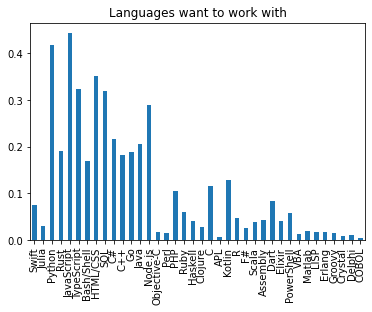

In [15]:
plot_bar_from_dict(LanguageWantToWorkWith, df.shape[0], "Languages want to work with")

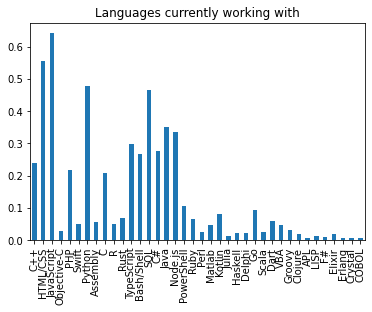

In [23]:
plot_bar_from_dict(LanguageHaveWorkedWith, df.shape[0], "Languages currently working with")